In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [25]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [26]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

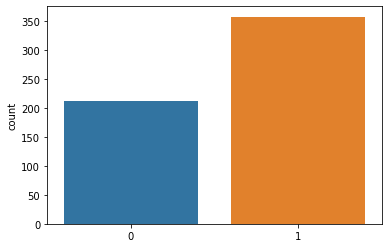

In [27]:
# visualization
ax = sns.countplot(data['target'],label='count')

In [28]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Creating a Dataframe

In [29]:
df = pd.DataFrame(np.c_[data.data,data.target],columns=[list(data.feature_names)+['target']])
df.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [30]:
# df.keys()
# df.columns

In [31]:
X=df.iloc[:,:-1].values
y = df.iloc[:, -1].values

# spliting data

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=501)

# Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test )

# Making first neural network

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [35]:
classifier = Sequential()

# Making layers 

In [36]:
# 1: making first input layer and first hidden layer ;
classifier.add(Dense(units=16,kernel_initializer='uniform',input_shape=(30,),activation ='relu'))
# for adding layer in classifier we use add method and for making layer we use Dense function ;
# units = number of neurons in layers ;
# input_dim = are the independent variable quantity from the data ;
# kernel_initializer = how to initialize the weights

In [37]:
# 2: second hidden layer ;
classifier.add(Dense(units = 16, activation = 'relu',))

# 3: output layer ;
classifier.add(Dense(units= 1,  activation = 'sigmoid',))

In [38]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])
# adam : is just like gradient descent ; it is the wayor algorithm to adjusting weights just like stochastic gradient descent ;
# loss : to calculate the loss ; if output type is multiple then we use categorical_crossentropy ; when binary then we use binary_crossentropy ;
# metrics : show accuracy while going through different epoch(iteration) ;

In [39]:
classifier.fit(X_train,y_train,batch_size=100,epochs=100) # 100 quantity train at a time ;

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4637
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.8374
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.9385
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.9473
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.9473
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.9473
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.9495
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.9516
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3939 - accuracy: 0.9560
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3611 - accuracy: 0.9560
Epoch 11/100
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9912
Epoch 85/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9912
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9912
Epoch 87/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9912
Epoch 88/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9912
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9934
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9934
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9934
Epoch 92/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9934
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9934
Epoch 94/100
5/5 [===============

# predicting the Test set results

In [40]:
y_pred = classifier.predict(X_test)
y_pred= (y_pred >0.5)
y_pred.shape

(114, 1)

# Making the confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[34,  2],
       [ 7, 71]], dtype=int64)

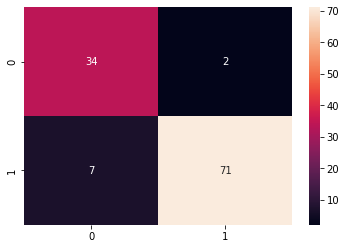

In [42]:
sns.heatmap(cm,annot=True)